In [178]:
# Importing the required packages

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


## Loading the Dataset

In [179]:
#### load the Audtomobile dataset and create their dataframes

auto_df = pd.read_csv('automobile.txt')
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [180]:
#Get the shape of the Dataset
auto_df.shape  #205 rows and 26 column


(205, 26)

In [181]:
#Check for null values or missing valuesthroughout rows
auto_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [182]:
#Check for datatype
auto_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [183]:
#Statistic Data
auto_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Checking for all fields having bad data

Cleaning the field normalized-losses

In [184]:
auto_df['normalized-losses'].head()

0      ?
1      ?
2      ?
3    164
4    164
Name: normalized-losses, dtype: object

In [185]:
# Some row has ? data in normalized-losses
auto_df['normalized-losses'].loc[auto_df['normalized-losses']=='?'].count() #41

41

In [186]:
#Replacing the field with mean value and converting that field to integer
norloss = auto_df['normalized-losses'].loc[auto_df['normalized-losses'] !='?']    #getting all fields without '?'
norlossmean = norloss.astype(str).astype(int).mean() # converting the field object to string then to int and getting mean()
auto_df['normalized-losses'] = auto_df['normalized-losses'].replace('?',norlossmean).astype(int)
auto_df['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

Checking and Cleaning the field - make

In [187]:

auto_df['make'].str.isnumeric().value_counts()

False    205
Name: make, dtype: int64

Checking and Cleaning the field - fuel-type

In [188]:
auto_df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

Checking and Cleaning the field - aspiration

In [189]:
auto_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

Checking and Cleaning the field - num-of-doors

In [190]:
auto_df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [191]:
#Removing the rows which is having '?' or assigning all value with correct data in dataset
auto_df = auto_df[auto_df['num-of-doors'] != '?']


In [192]:
#Checking the num-of-doors column again
auto_df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Checking and Cleaning the field - fuel-system

In [193]:
auto_df['fuel-system'].value_counts()

mpfi    93
2bbl    66
idi     19
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

Checking and Cleaning the field - bore

In [194]:
auto_df['bore'].value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    11
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.39     5
3.70     5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.50     2
3.80     2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.60     1
2.92     1
3.76     1
2.68     1
2.99     1
Name: bore, dtype: int64

In [195]:
# Find out the number of invalid value
auto_df['bore'].loc[auto_df['bore'] == '?'].value_counts()

?    4
Name: bore, dtype: int64

In [196]:
# Replace the non-numeric value to null and convert the datatype
auto_df['bore']= pd.to_numeric(auto_df['bore'],errors='coerce')
auto_df['bore'].dtype

dtype('float64')

Checking and cleaning the field - Stroke

In [197]:
auto_df['stroke'].loc[auto_df['stroke']== '?'].value_counts()

?    4
Name: stroke, dtype: int64

In [198]:
# Replace the non-numeric value to null and convert the datatype
auto_df['stroke'] = pd.to_numeric(auto_df['stroke'],errors='coerce')
auto_df['stroke'].dtype

dtype('float64')

Cleaning the peak rpm data

In [199]:
auto_df['peak-rpm'].str.isnumeric().value_counts()

True     201
False      2
Name: peak-rpm, dtype: int64

In [200]:
# Replace the non-numeric value to null and convert the datatype
auto_df['peak-rpm']=pd.to_numeric(auto_df['peak-rpm'],errors='coerce')
auto_df['peak-rpm'].dtypes

dtype('float64')

In [201]:
auto_df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Checking and Cleaning the field - horsepower

In [202]:
auto_df['horsepower'].loc[auto_df['horsepower']== '?'].value_counts()

?    2
Name: horsepower, dtype: int64

In [203]:
#Replacing the field with mean value and converting horsepower field to integer
hpower = auto_df['horsepower'].loc[auto_df['horsepower'] != '?']
hpowermean = hpower.astype(str).astype(int).mean()
auto_df['horsepower'] = auto_df['horsepower'].replace('?',hpowermean).astype(int)

In [204]:
auto_df['horsepower'].loc[auto_df['horsepower']== '?'].value_counts()

Series([], Name: horsepower, dtype: int64)

Checking and Cleaning the field - price

In [205]:
auto_df['price'].loc[auto_df['price']=='?'].value_counts()

?    4
Name: price, dtype: int64

In [206]:
#Replacing the field with mean value and converting price field to integer
price = auto_df['price'].loc[auto_df['price'] != '?']
pricemean= price.astype(str).astype(int).mean()
auto_df['price'] = auto_df['price'].replace('?',pricemean).astype(int)

In [207]:
auto_df.shape

(203, 26)

## DATA STORIES AND VISUALISATIONS

## Fuel type

Text(0.5, 0, 'Fuel Types')

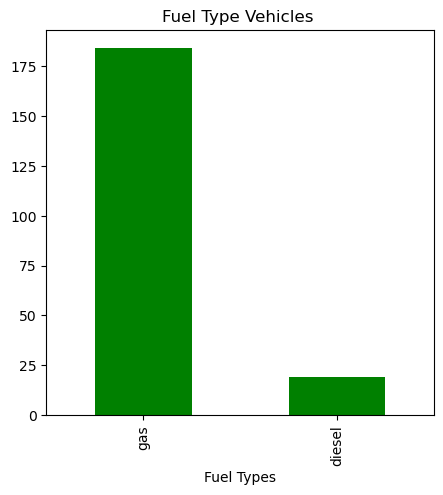

In [208]:
auto_df['fuel-type'].value_counts().plot.bar(figsize=(5,5),color = 'green')
plt.title("Fuel Type Vehicles ")
plt.xlabel('Fuel Types')

Most preferred fuel type for the customer is having more than 80% of the choice as gas.

### Number of Door Bar Charts

Text(0.5, 1.0, 'Number of Doors in Vehicles')

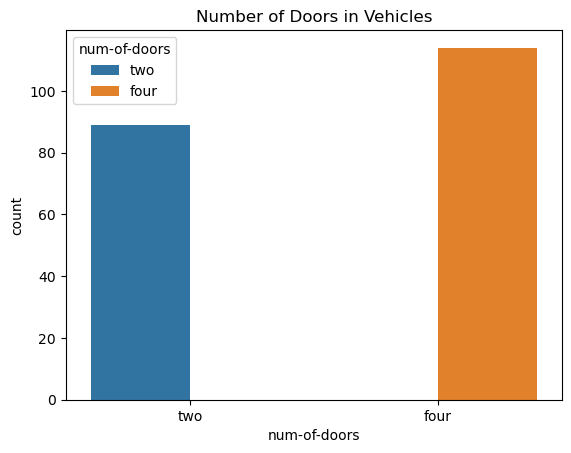

In [209]:
sns.countplot(data = auto_df , x = 'num-of-doors',hue= 'num-of-doors')
plt.title('Number of Doors in Vehicles')

Vehicles with four door seems to be more when compared to vechile with two doors.

### Top 10 Vehicles by Make

Text(0.5, 0, 'Make')

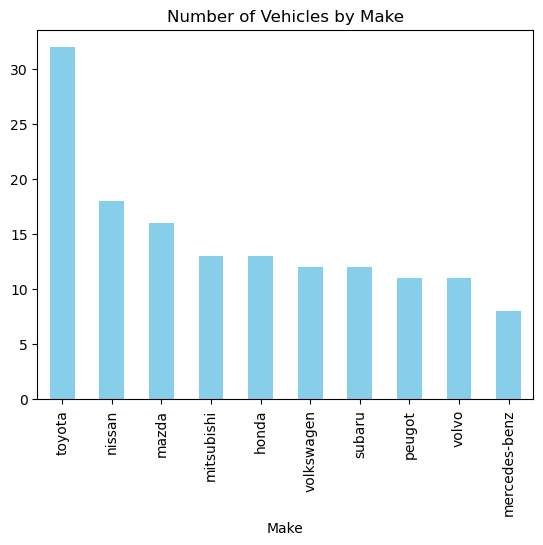

In [210]:
auto_df['make'].value_counts().nlargest(10).plot(kind='bar',color='skyblue')
plt.title("Number of Vehicles by Make")
plt.xlabel('Make')


We can analyse top 10 company who make more vicheles and toyota being the highest make overall.
Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan.

### Drive Wheels

Text(0.5, 1.0, 'Drive Wheels Vehicles ')

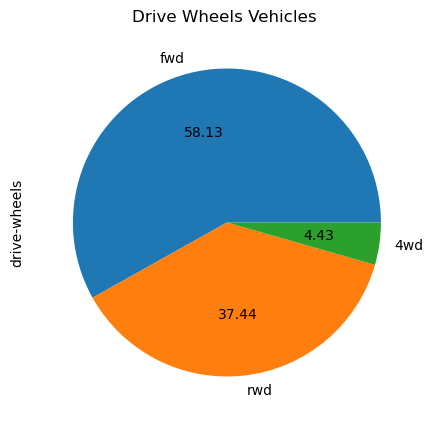

In [211]:
auto_df['drive-wheels'].value_counts().plot.pie(figsize=(5,5),autopct='%0.2f')
plt.title("Drive Wheels Vehicles ")


In [212]:
auto_df['body-style'].value_counts()
#auto_df.head()

sedan          94
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [213]:
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450


### Horsepower by style of Vehicle

Text(0.5, 1.0, 'Horsepower by body-style')

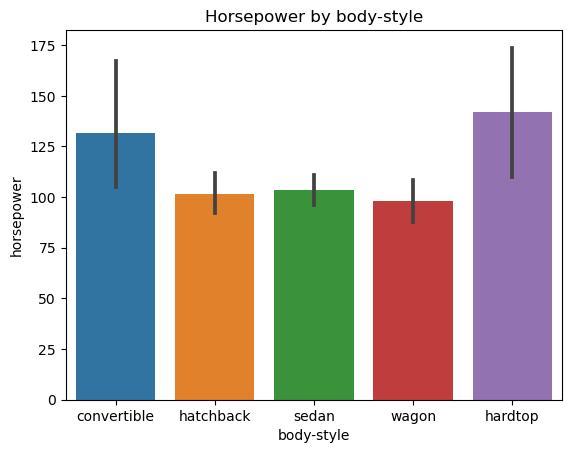

In [214]:
sns.barplot(x='body-style',y='horsepower',data = auto_df)
plt.title('Horsepower by body-style')

We can visualize from above graph that more horsepower in hardtop vehicles

### Scatter plot of price and engine size

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


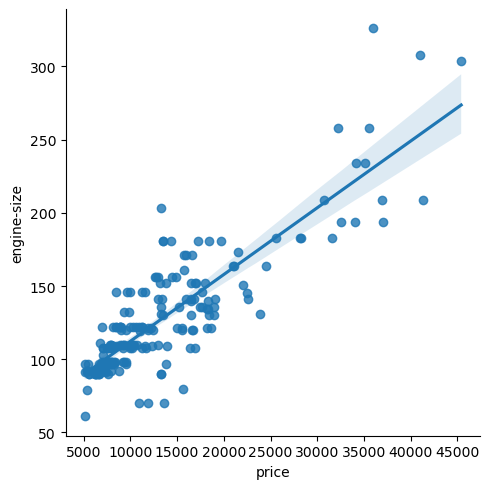

In [215]:
sns.lmplot('price',"engine-size", auto_df);

The more the engine size the costlier the price is for vehicles

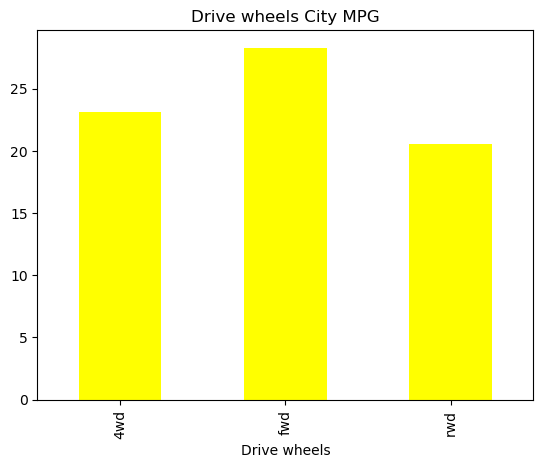

In [220]:
auto_df.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'yellow');
plt.title("Drive wheels City MPG")
plt.xlabel('Drive wheels');

we can see that Front wheel drive has higher efficiency in City MPG

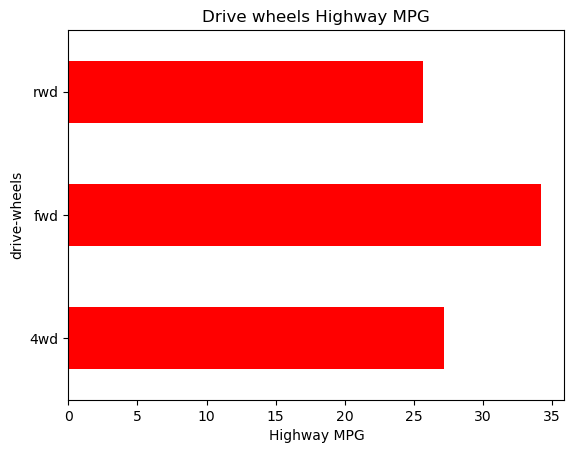

In [226]:
auto_df.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='barh', color = 'red');
plt.title("Drive wheels Highway MPG")
plt.xlabel('Highway MPG');

From the graph above we can see that the Front wheel drive has higher efficiency in Highway MPG